# Health Insurance Prediction - Team 4

---

**Mô tả**: Xây dựng mô hình dự đoán khách hàng đã sử dụng bảo hiểm sức khỏe có tham gia bảo hiểm phương tiện đi lại hay không.

## Outline

- <a href='#1'>1. Problem defining</a>
- <a href='#2'>2. Data validation </a>  
- <a href='#3'>3. Data analyzing - Phân tích dữ liệu </a>
- <a href='#4'>4. Sử dụng PyCaret </a>

### Import các thư viện

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# <a id='1'>1. Problem defining

Chúng ta sẽ sử dụng model classification để phân loại người dùng vào hai lớp `1` vào `0`:
- `1` - những người sẽ quan tâm đến bảo hiểm xe cộ
- `0` - không quan tâm

# <a id='2'>2. Data validation </a>

### Load data

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/massp-health-insurance-prediction/submission.csv
/kaggle/input/massp-health-insurance-prediction/train.csv
/kaggle/input/massp-health-insurance-prediction/test.csv


In [3]:
def load_data():
    df_train = pd.read_csv('/kaggle/input/massp-health-insurance-prediction/train.csv')
    df_test = pd.read_csv('/kaggle/input/massp-health-insurance-prediction/test.csv')
    df_test = df_test[['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage']]
    return df_train, df_test

df_train, df_test = load_data()

In [4]:
print('Kích thước tập train: {}'.format(df_train.shape))
print('Kích thước tập test : {}'.format(df_test.shape))

Kích thước tập train: (190554, 12)
Kích thước tập test : (190555, 11)


In [5]:
df_train.head()

,Response,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0,0,Male,26,1,8.0,1,< 1 Year,No,37518.0,152.0,173
1,1,1,Male,43,1,3.0,0,1-2 Year,Yes,25073.0,124.0,81
2,0,2,Female,25,1,37.0,1,< 1 Year,No,18543.0,152.0,80
3,0,3,Male,52,1,8.0,0,> 2 Years,Yes,2630.0,156.0,12
4,0,4,Male,53,1,8.0,0,1-2 Year,Yes,39579.0,26.0,147


In [6]:
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,190554,Male,23,1,30.0,1,< 1 Year,No,28282.0,154.0,78
1,190555,Female,28,1,28.0,0,< 1 Year,Yes,51937.0,122.0,107
2,190556,Female,48,1,46.0,0,1-2 Year,Yes,2630.0,26.0,178
3,190557,Male,44,1,28.0,0,1-2 Year,Yes,47852.0,31.0,223
4,190558,Male,43,1,14.0,0,1-2 Year,Yes,42603.0,124.0,220


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190554 entries, 0 to 190553
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Response              190554 non-null  int64  
 1   id                    190554 non-null  int64  
 2   Gender                190554 non-null  object 
 3   Age                   190554 non-null  int64  
 4   Driving_License       190554 non-null  int64  
 5   Region_Code           190554 non-null  float64
 6   Previously_Insured    190554 non-null  int64  
 7   Vehicle_Age           190554 non-null  object 
 8   Vehicle_Damage        190554 non-null  object 
 9   Annual_Premium        190554 non-null  float64
 10  Policy_Sales_Channel  190554 non-null  float64
 11  Vintage               190554 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 17.4+ MB


**Thông tin các trường dữ liệu:**
- `id`: Mỗi khách hàng có 1 id
- `Gender`: Giới tính khách hàng
- `Age`: Tuổi khách hàng
- `Driving_License`: 0 : Khách không có bằng lái, 1 : Có bằng lái
- `Region_Code`: Mã khu vực của khách hàng
- `Previously_Insured`: 1 : Khách đã có bảo hiểm xe cộ, 0 : Chưa có bảo hiểm 
- `Vehicle_Age`: Thời gian mua xe
- `Vehicle_Damage`: 1 : Xe của khách đã phải đi sửa. 0 : Chưa phải đi sửa
- `Annual_Premium`: Phí bảo hiểm hàng năm
- `Policy_Sales_Channel`: Các kênh bán hàng ie. Different Agents, Over Mail, Over Phone, In Person, etc.
- `Vintage`: Thời gian bằng ngày từ khi khách mua sản phẩm của công ty
- `Response`: 1 : Khách quan tâm đến bảo hiểm xe, 0 : Không quan tâm

Các trường `Gender`, `Vehicle_Age` và `Vehicle_Damage` là các trường phân loại và các trường còn lại là trường số.

### Kiểm tra dữ liệu thiếu

In [8]:
print('Kiểm tra dữ liệu thiếu tập train: {}'.format(df_train.isnull().any().any()))
print('Kiểm tra dữ liệu thiếu tập test : {}'.format(df_train.isnull().any().any()))

Kiểm tra dữ liệu thiếu tập train: False
Kiểm tra dữ liệu thiếu tập test : False


## Thay đổi định dạng của các trường phân loại

In [9]:
def encode(df_train, df_test, exceptions=[]):
    # Change categoricals to type 'category'
    for df in [df_train, df_test]:
        categoricals = df.select_dtypes(exclude=[np.number]).columns.values
        for name in categoricals:
            df[name] = df[name].astype("category")
            # Add a None category for missing values
            if "None" not in df[name].cat.categories:
                df[name].cat.add_categories("None", inplace=True)
        for name in exceptions:
            df[name] = df[name].astype("category")
            if "None" not in df[name].cat.categories:
                df[name].cat.add_categories("None", inplace=True)
    return df_train, df_test

df_train, df_test = encode(df_train, df_test, ['Policy_Sales_Channel', 'Region_Code', 'Driving_License', 'Previously_Insured'])

In [10]:
df_train.dtypes

Response                   int64
id                         int64
Gender                  category
Age                        int64
Driving_License         category
Region_Code             category
Previously_Insured      category
Vehicle_Age             category
Vehicle_Damage          category
Annual_Premium           float64
Policy_Sales_Channel    category
Vintage                    int64
dtype: object

In [11]:
df_train.head()

,Response,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0,0,Male,26,1,8.0,1,< 1 Year,No,37518.0,152.0,173
1,1,1,Male,43,1,3.0,0,1-2 Year,Yes,25073.0,124.0,81
2,0,2,Female,25,1,37.0,1,< 1 Year,No,18543.0,152.0,80
3,0,3,Male,52,1,8.0,0,> 2 Years,Yes,2630.0,156.0,12
4,0,4,Male,53,1,8.0,0,1-2 Year,Yes,39579.0,26.0,147


### Quan sát các thống kê

In [12]:
df_train.describe()

,Response,id,Age,Annual_Premium,Vintage
count,190554.000000,190554.000000,190554.000000,190554.000000,190554.000000
mean,0.122564,95276.500000,38.861362,30583.232081,154.414066
std,0.327937,55008.345935,15.517536,17282.001992,83.568024
min,0.000000,0.000000,20.000000,2630.000000,10.000000
25%,0.000000,47638.250000,25.000000,24394.000000,82.000000
50%,0.000000,95276.500000,36.000000,31691.000000,155.000000
75%,0.000000,142914.750000,49.000000,39395.000000,227.000000
max,1.000000,190553.000000,85.000000,540165.000000,299.000000


In [13]:
df_test.describe()

,id,Age,Annual_Premium,Vintage
count,190555.00000,190555.000000,190555.000000,190555.000000
mean,285831.00000,38.783805,30545.547181,154.280727
std,55008.63461,15.505627,17144.056651,83.774622
min,190554.00000,20.000000,2630.000000,10.000000
25%,238192.50000,25.000000,24410.000000,82.000000
50%,285831.00000,36.000000,31648.000000,154.000000
75%,333469.50000,49.000000,39407.000000,227.000000
max,381108.00000,85.000000,540165.000000,299.000000


In [14]:
df_train.select_dtypes(exclude=[np.number]).describe()

,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel
count,190554,190554,190554.0,190554,190554,190554,190554.0
unique,2,2,53.0,2,3,2,146.0
top,Male,1,28.0,0,1-2 Year,Yes,152.0
freq,103227,190165,53438.0,103593,100311,96407,67133.0


In [15]:
df_test.select_dtypes(exclude=[np.number]).describe()

,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel
count,190555,190555,190555.0,190555,190555,190555,190555.0
unique,2,2,53.0,2,3,2,151.0
top,Male,1,28.0,0,1-2 Year,Yes,152.0
freq,102862,190132,52977.0,102888,100005,96006,67651.0


**Nhận xét:**
- Thống kê các trường features của 2 tập tương đối nhất quán.
- Phân bố của trường `Annual_Premium` khá lệch.

# <a href='#3'>3. Data analyzing - Phân tích dữ liệu </a>

## <a id='#3.1'>3.1. Tổng quan trường target </a>

In [16]:
print('Số khách không quan tâm', round(df_train.Response.value_counts()[0]/len(df_train) * 100,2), '% dữ liệu')
print('Số khách quan tâm', round(df_train.Response.value_counts()[1]/len(df_train) * 100,2), '% dữ liệu')

Số khách không quan tâm 87.74 % dữ liệu
Số khách quan tâm 12.26 % dữ liệu


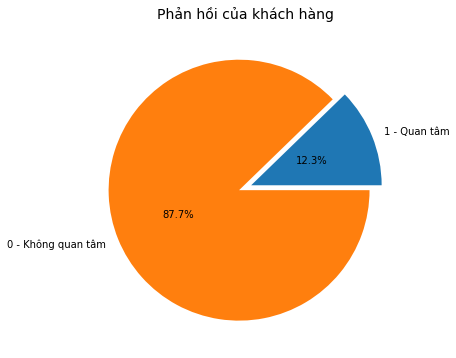

In [17]:
class_0 = df_train.Response.value_counts()[0]
class_1 = df_train.Response.value_counts()[1]
labels = ['1 - Quan tâm', '0 - Không quan tâm']
pie, ax = plt.subplots(figsize=[10,6])
plt.pie([class_1, class_0], autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5)
plt.title("Phản hồi của khách hàng", fontsize=14);

**Nhận xét:** Phân bố của trường Target có sự mất cân bằng.

## <a id='#3.2'>3.2. Phân tích dữ liệu trường phân loại </a>

In [18]:
def plot_stats(train, feature, label,width = 12):
    x, y, hue = label, "prop", feature
    temp = train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Số lượng khách hàng ': temp.values})
    hue_order = train[feature].unique()
    f, axes = plt.subplots(1, 2, figsize=(width, 6))
    s = sns.barplot(ax=axes[0], x=feature, y="Số lượng khách hàng ", data=df1, order=hue_order)

    prop_df = (train[hue]
               .groupby(train[x])
               .value_counts(normalize=True)
               .rename(y)
               .reset_index())

    sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1], hue_order=hue_order)
    plt.ylabel('Percent of target with the corresponding value [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.show();

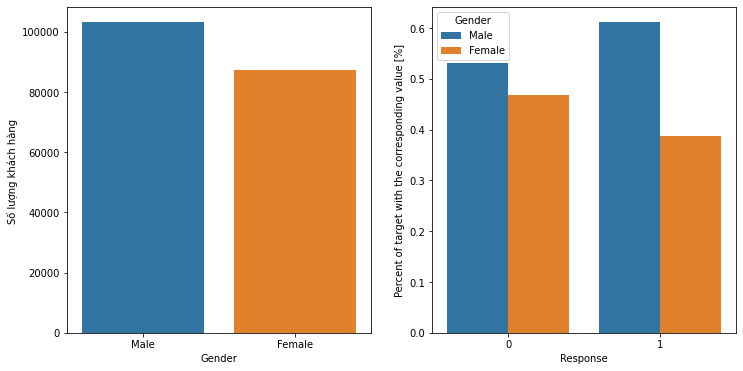

In [19]:
plot_stats(df_train, 'Gender', 'Response')

- Nhận thấy khách hàng nữ ít hơn, nhưng tỉ lệ nam nữ có phản hồi có hoặc không quan tâm tương đối đồng đều.

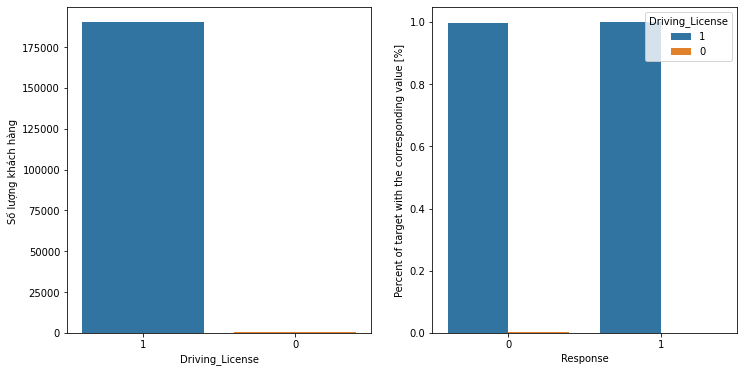

In [20]:
plot_stats(df_train, 'Driving_License', 'Response')

- Hầu hết khách hàng được khảo sát đều có bằng lái xe. 

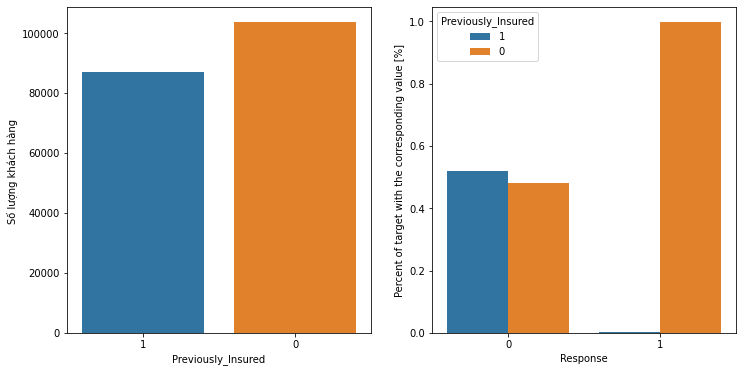

In [21]:
plot_stats(df_train, 'Previously_Insured', 'Response')

- Không có chênh lệch lớn giữa khách hàng đã và chưa sử dụng bảo hiểm.
- Những người đã có bảo hiểm thì không quan tâm đến bảo hiểm khác.

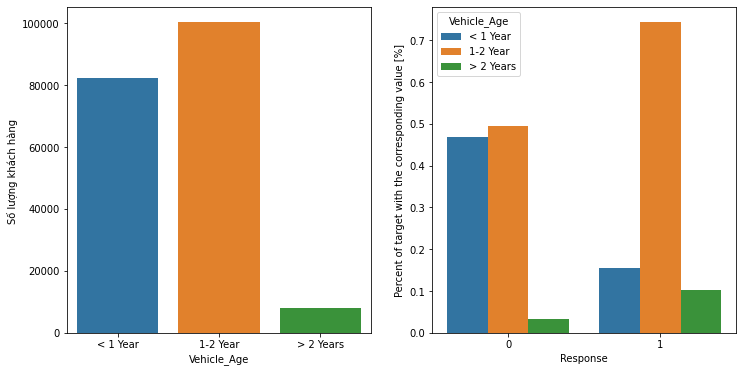

In [22]:
plot_stats(df_train, 'Vehicle_Age', 'Response')

- Khách hàng lâu năm chiếm tỉ lệ ít, tập trung chủ yếu là sử dụng bảo hiểm của công ty từ 2 năm trở lại.
- Khách hàng từ 1-2 năm quan tâm hơn đến bảo hiểm xe cộ so với các lớp khách hàng khác.

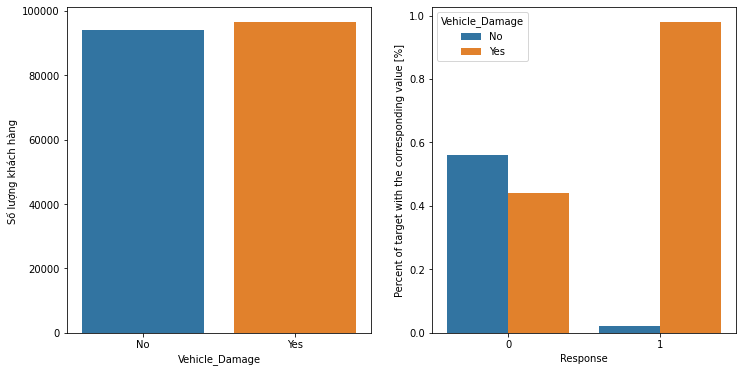

In [23]:
plot_stats(df_train, 'Vehicle_Damage', 'Response')

- Khách hàng có xe từng bị hỏng là quan tâm nhiều hơn đến bảo hiểm xe cộ hơn là khách chưa từng bị hỏng xe.

## 3.3. Phân tích dữ liệu trường số

### Hàm vẽ phân phối theo từng target.

In [24]:
def plot_numeric_var(col):
    plt.figure(num=None, figsize=(10, 4), dpi=80)
    ax1 = sns.kdeplot(df_train.loc[df_train['Response'] == 1, col] , label = 'Customer is interested', linewidth=5.0)
    sns.kdeplot(df_train.loc[df_train['Response'] == 0, col] , label = 'Customer is not interested', linewidth=5.0)

    ax1.tick_params(axis='both', which='major', labelsize=15)
    ax1.set_ylabel('Density', size=20)
    ax1.set_xlabel(col, size=18)

    leg = plt.legend()
    leg_texts = leg.get_texts()
    plt.setp(leg_texts, fontsize='x-large')
    plt.grid()
    plt.show()

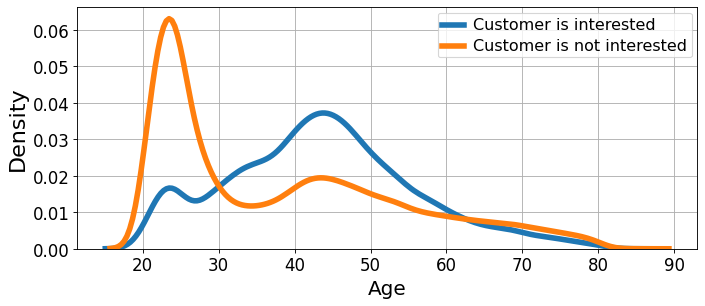

In [25]:
plot_numeric_var('Age')

**Nhận xét:**
- Có sự phân phối không đồng đều giữa ở các độ tuổi đối với target: Khác hàng có độ tuổi lớn hơn (40-50) có xu hướng quan tâm đến bảo hiểm xe cộ.
- Độ tuổi tập trung 20-30

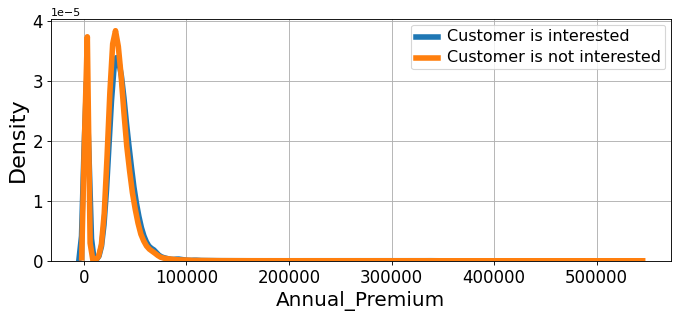

In [26]:
plot_numeric_var('Annual_Premium')

- Không có sự khác biệt đáng kể giữa 2 lớp khách hàng trong trường này.

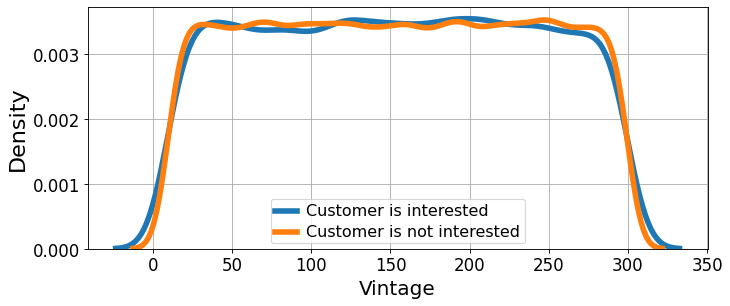

In [27]:
plot_numeric_var('Vintage')

- Cũng không có sự khác biệt đáng kể nào giữa 2 lớp ở trường này.

# 4. Sử dụng PyCaret

Thư viện [PyCaret](https://github.com/pycaret/pycaret) cho phép tự động hóa rất nhiều công việc trong xây dựng một mô hình học máy. 

In [28]:
!pip install pycaret

     |████████████████████████████████| 261 kB 2.7 MB/s 
     |████████████████████████████████| 167 kB 6.9 MB/s 
     |████████████████████████████████| 104 kB 7.9 MB/s 
     |████████████████████████████████| 6.8 MB 6.2 MB/s 
     |████████████████████████████████| 24.2 MB 28.7 MB/s 
     |████████████████████████████████| 14.2 MB 28.9 MB/s 
     |████████████████████████████████| 54 kB 2.1 MB/s 
     |████████████████████████████████| 1.1 MB 26.4 MB/s 
     |████████████████████████████████| 79 kB 6.1 MB/s 
     |████████████████████████████████| 1.7 MB 28.0 MB/s 
  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - done
  Installing backend dependencies ... - \ | done
    Preparing wheel metadata ... - done
     |████████████████████████████████| 1.7 MB 46.0 MB/s 
  Created wheel for alembic: filename=alembic-1.4.1-py2.py3-none-any.whl size=158155 sha256=09df9747ea6e1c9a499088405f4d802f9baf2c470838e8651bad3f291525945b
  Stor

In [29]:
from pycaret.classification import *

In [30]:
clf = setup(data=df_train.drop('id', axis=1), target='Response', silent=True)

,Description,Value
0,session_id,5232
1,Target,Response
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(190554, 11)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


In [31]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8782,0.0000,0.0000,0.0000,0.0000,-0.0001,-0.0014,0.2870
gbc,Gradient Boosting Classifier,0.8782,0.8539,0.0008,0.5067,0.0016,0.0012,0.0152,20.4420
lightgbm,Light Gradient Boosting Machine,0.8782,0.8539,0.0085,0.4980,0.0167,0.0127,0.0524,1.1830
ada,Ada Boost Classifier,0.8779,0.8509,0.0060,0.4256,0.0118,0.0084,0.0381,4.7960
catboost,CatBoost Classifier,0.8770,0.8540,0.0251,0.4197,0.0474,0.0341,0.0779,37.8150
lda,Linear Discriminant Analysis,0.8765,0.8442,0.0155,0.3461,0.0296,0.0194,0.0506,3.7950
lr,Logistic Regression,0.8764,0.7907,0.0142,0.2956,0.0270,0.0172,0.0435,2.3540
rf,Random Forest Classifier,0.8642,0.8279,0.1188,0.3370,0.1756,0.1198,0.1394,15.5080
knn,K Neighbors Classifier,0.8627,0.5736,0.0424,0.1999,0.0699,0.0285,0.0388,4.3960
et,Extra Trees Classifier,0.8557,0.8163,0.1630,0.3192,0.2157,0.1453,0.1554,23.8110


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=5232,
                solver='auto', tol=0.001)

In [32]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8767,0.8529,0.0302,0.4118,0.0562,0.0403,0.0841
1,0.8775,0.8488,0.0240,0.4432,0.0456,0.0335,0.0801
2,0.8757,0.8468,0.0216,0.3365,0.0405,0.0262,0.0582
3,0.8779,0.8509,0.0258,0.4773,0.0490,0.0370,0.0886
4,0.8762,0.8519,0.0252,0.3796,0.0473,0.0326,0.0712
5,0.8772,0.8538,0.0252,0.4316,0.0477,0.0347,0.0802
6,0.8768,0.8602,0.0191,0.3875,0.0364,0.0252,0.0631
7,0.8773,0.8594,0.0271,0.4400,0.0510,0.0374,0.0846
8,0.8784,0.8577,0.0308,0.5102,0.0581,0.0448,0.1022
9,0.8765,0.8576,0.0222,0.3789,0.0419,0.0288,0.0666


In [33]:
tuned_cat = tune_model(catboost, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8778,0.8539,0.0123,0.4348,0.0240,0.0174,0.0563
1,0.8780,0.8491,0.0055,0.4286,0.0109,0.0079,0.0373
2,0.8779,0.8467,0.0055,0.3913,0.0109,0.0076,0.0343
3,0.8791,0.8506,0.0160,0.6500,0.0312,0.0255,0.0886
4,0.8779,0.8511,0.0105,0.4474,0.0204,0.0150,0.0532
5,0.8777,0.8527,0.0129,0.4286,0.0251,0.0181,0.0569
6,0.8785,0.8611,0.0092,0.5769,0.0182,0.0144,0.0615
7,0.8779,0.8594,0.0043,0.3889,0.0085,0.0059,0.0300
8,0.8783,0.8564,0.0105,0.5152,0.0205,0.0157,0.0599
9,0.8786,0.8580,0.0117,0.5758,0.0229,0.0182,0.0691


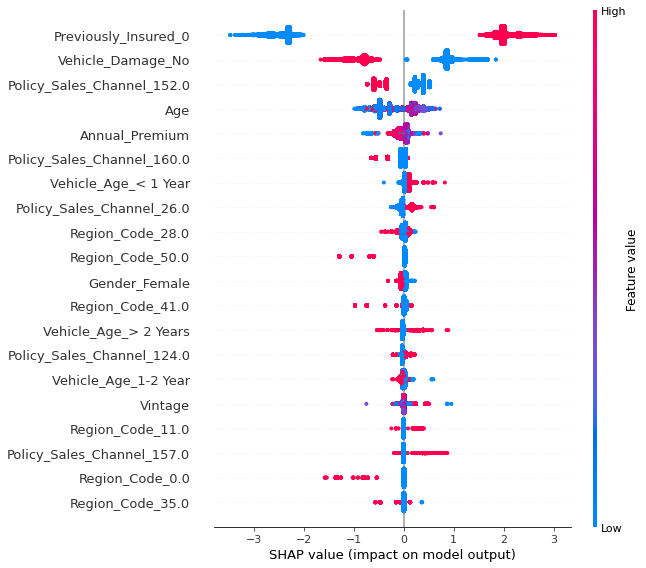

In [34]:
interpret_model(tuned_cat, plot='summary')

In [35]:
evaluate_model(tuned_cat)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [36]:
predict_model(tuned_cat)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8755,0.8551,0.0096,0.4789,0.0188,0.0139,0.0536


,Age,Annual_Premium,Vintage,Gender_Female,Driving_License_0,Region_Code_0.0,Region_Code_1.0,Region_Code_10.0,Region_Code_11.0,Region_Code_12.0,...,Policy_Sales_Channel_93.0,Policy_Sales_Channel_94.0,Policy_Sales_Channel_95.0,Policy_Sales_Channel_96.0,Policy_Sales_Channel_97.0,Policy_Sales_Channel_98.0,Policy_Sales_Channel_99.0,Response,Label,Score
0,20.0,2630.0,74.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9997
1,42.0,35278.0,76.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9992
2,39.0,36123.0,203.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9989
3,27.0,28388.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9999
4,49.0,35188.0,105.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57162,43.0,26058.0,83.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.7192
57163,45.0,30883.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.6492
57164,32.0,2630.0,261.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.6282
57165,21.0,30468.0,130.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9752


In [37]:
final_cat = finalize_model(tuned_cat)

In [38]:
predict_model(final_cat)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8760,0.8593,0.0103,0.5935,0.0202,0.0160,0.0660


,Age,Annual_Premium,Vintage,Gender_Female,Driving_License_0,Region_Code_0.0,Region_Code_1.0,Region_Code_10.0,Region_Code_11.0,Region_Code_12.0,...,Policy_Sales_Channel_93.0,Policy_Sales_Channel_94.0,Policy_Sales_Channel_95.0,Policy_Sales_Channel_96.0,Policy_Sales_Channel_97.0,Policy_Sales_Channel_98.0,Policy_Sales_Channel_99.0,Response,Label,Score
0,20.0,2630.0,74.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9998
1,42.0,35278.0,76.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9993
2,39.0,36123.0,203.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9991
3,27.0,28388.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9997
4,49.0,35188.0,105.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57162,43.0,26058.0,83.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.7102
57163,45.0,30883.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.6581
57164,32.0,2630.0,261.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.6208
57165,21.0,30468.0,130.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9793


In [39]:
predict_model(final_cat, data=df_test.drop('id', axis=1), raw_score=True)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Label,Score_0,Score_1
0,Male,23,1,30.0,1,< 1 Year,No,28282.0,154.0,78,0,0.9997,0.0003
1,Female,28,1,28.0,0,< 1 Year,Yes,51937.0,122.0,107,0,0.6958,0.3042
2,Female,48,1,46.0,0,1-2 Year,Yes,2630.0,26.0,178,0,0.7259,0.2741
3,Male,44,1,28.0,0,1-2 Year,Yes,47852.0,31.0,223,0,0.6700,0.3300
4,Male,43,1,14.0,0,1-2 Year,Yes,42603.0,124.0,220,0,0.7306,0.2694
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190550,Male,24,1,30.0,1,1-2 Year,No,26891.0,124.0,17,0,0.9996,0.0004
190551,Female,32,1,20.0,0,1-2 Year,Yes,2630.0,26.0,59,0,0.7044,0.2956
190552,Male,58,1,28.0,0,1-2 Year,Yes,46831.0,25.0,71,0,0.7413,0.2587
190553,Female,59,1,15.0,1,1-2 Year,No,46089.0,14.0,219,0,0.9996,0.0004


In [40]:
prep_pipe = get_config('prep_pipe')
prep_pipe

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Response',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_st...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='Response')),
                ('fix_perfect', Re

In [41]:
predictions_test = final_cat.predict_proba(prep_pipe.transform(df_test.drop('id', axis=1)))

In [42]:
df_test = pd.read_csv('/kaggle/input/massp-health-insurance-prediction/test.csv')
my_submission = pd.DataFrame({'id': df_test.id, 'Response':predictions_test[:,1]})
# you could use any filename. We choose submission here
my_submission.to_csv('./submission.csv', index=False)

In [43]:
my_submission.head(10)

,id,Response
0,190554,0.000308
1,190555,0.304200
2,190556,0.274087
3,190557,0.330023
4,190558,0.269409
5,190559,0.003222
6,190560,0.367883
7,190561,0.219659
8,190562,0.336947
9,190563,0.309415


# Tổng kết

Notebook này chỉ mới sử dụng những tính năng cơ bản nhất của thư viện PyCaret để xây dựng mô hình cho cuộc thi in-class MaSSP - Health Insurance Prediction. Để hiểu rõ hơn về thư viện PyCaret và sử dụng những công cụ nâng cao hơn do thư viện này cung cấp, các bạn có thể tham khảo trang [Github](https://github.com/pycaret/pycaret).